In [1]:
import pandas as pd
import numpy as np

In [2]:
#loading training sets
train_knn=pd.read_csv('knn imputed train set.csv')
train_iter=pd.read_csv('iter imputed train set.csv')

In [3]:
valid_knn=pd.read_csv('knn imputed valid set.csv')
valid_iter=pd.read_csv('iter imputed valid set.csv')

In [4]:
from sklearn.model_selection import train_test_split as tts
from lightgbm import LGBMClassifier

In [5]:
lgbm=LGBMClassifier(is_unbalance=True)

Converting categorical columns to category

In [6]:
for i in train_iter.select_dtypes('object'):
    train_iter[i]=train_iter[i].astype('category')
train_iter['Term']=train_iter['Term'].astype('category')
train_iter['Tax Liens']=train_iter['Tax Liens'].astype('category')
train_iter['Bankruptcies']=train_iter['Bankruptcies'].astype('category')
train_iter['Number of Credit Problems']=train_iter['Number of Credit Problems'].astype('category')
train_iter['Years in current job']=train_iter['Years in current job'].astype('category')
train_iter['Number of Credit Problems']=train_iter['Number of Credit Problems'].astype('category')

In [7]:
for i in train_knn.select_dtypes('object'):
    train_knn[i]=train_knn[i].astype('category')
train_knn['Term']=train_knn['Term'].astype('category')
train_knn['Tax Liens']=train_knn['Tax Liens'].astype('category')
train_knn['Bankruptcies']=train_knn['Bankruptcies'].astype('category')
train_knn['Number of Credit Problems']=train_knn['Number of Credit Problems'].astype('category')
train_knn['Years in current job']=train_knn['Years in current job'].astype('category')
train_knn['Number of Credit Problems']=train_knn['Number of Credit Problems'].astype('category')

In [8]:
for i in valid_iter.select_dtypes('object'):
    valid_iter[i]=valid_iter[i].astype('category')
valid_iter['Term']=valid_iter['Term'].astype('category')
valid_iter['Tax Liens']=valid_iter['Tax Liens'].astype('category')
valid_iter['Bankruptcies']=valid_iter['Bankruptcies'].astype('category')
valid_iter['Number of Credit Problems']=valid_iter['Number of Credit Problems'].astype('category')
valid_iter['Years in current job']=valid_iter['Years in current job'].astype('category')
valid_iter['Number of Credit Problems']=valid_iter['Number of Credit Problems'].astype('category')

In [9]:
for i in valid_knn.select_dtypes('object'):
    valid_knn[i]=valid_knn[i].astype('category')
valid_knn['Term']=valid_knn['Term'].astype('category')
valid_knn['Tax Liens']=valid_knn['Tax Liens'].astype('category')
valid_knn['Bankruptcies']=valid_knn['Bankruptcies'].astype('category')
valid_knn['Number of Credit Problems']=valid_knn['Number of Credit Problems'].astype('category')
valid_knn['Years in current job']=valid_knn['Years in current job'].astype('category')
valid_knn['Number of Credit Problems']=valid_knn['Number of Credit Problems'].astype('category')

In [10]:
x_trainknn=train_knn.drop(['Loan Status','Months since last delinquent','Years in current job'],axis=1)
y_trainknn=train_knn['Loan Status']
x_validknn=valid_knn.drop(['Loan Status','Months since last delinquent','Years in current job'],axis=1)
y_validknn=valid_knn['Loan Status']

In [11]:
lgbm.fit(x_trainknn,y_trainknn)

LGBMClassifier(is_unbalance=True)

In [12]:
#Using metrics to test the model
from sklearn.metrics import *
pd.DataFrame(data=[accuracy_score(y_validknn,lgbm.predict(x_validknn)), recall_score(y_validknn,lgbm.predict(x_validknn)),
                   precision_score(y_validknn,lgbm.predict(x_validknn)), roc_auc_score(y_validknn,lgbm.predict_proba(x_validknn)[:,1]),
                   f1_score(y_validknn,lgbm.predict(x_validknn))], 
             index=["accuracy", "recall", "precision", "roc_auc_score","f1_score"])

,0
accuracy,0.631088
recall,0.662959
precision,0.407024
roc_auc_score,0.697958
f1_score,0.504382


In [13]:
#Using metrics to test the model
from sklearn.metrics import *
pd.DataFrame(data=[accuracy_score(y_trainknn,lgbm.predict(x_trainknn)), recall_score(y_trainknn,lgbm.predict(x_trainknn)),
                   precision_score(y_trainknn,lgbm.predict(x_trainknn)), roc_auc_score(y_trainknn,lgbm.predict_proba(x_trainknn)[:,1]),
                   f1_score(y_trainknn,lgbm.predict(x_trainknn))], 
             index=["accuracy", "recall", "precision", "roc_auc_score","f1_score"])

,0
accuracy,0.664703
recall,0.715066
precision,0.442927
roc_auc_score,0.746677
f1_score,0.547019


On conditional mean

In [14]:
x_trainiter=train_iter.drop(['Loan Status','Months since last delinquent','Years in current job'],axis=1)
y_trainiter=train_iter['Loan Status']
x_validiter=valid_iter.drop(['Loan Status','Months since last delinquent','Years in current job'],axis=1)
y_validiter=valid_iter['Loan Status']

In [15]:
lgbm.fit(x_trainiter,y_trainiter)

LGBMClassifier(is_unbalance=True)

In [16]:
#Using metrics to test the model
from sklearn.metrics import *
pd.DataFrame(data=[accuracy_score(y_trainiter,lgbm.predict(x_trainiter)), recall_score(y_trainiter,lgbm.predict(x_trainiter)),
                   precision_score(y_trainiter,lgbm.predict(x_trainiter)), roc_auc_score(y_trainiter,lgbm.predict_proba(x_trainiter)[:,1]),
                   f1_score(y_trainiter,lgbm.predict(x_trainiter))], 
             index=["accuracy", "recall", "precision", "roc_auc_score","f1_score"])

,0
accuracy,0.760376
recall,0.752607
precision,0.556837
roc_auc_score,0.842682
f1_score,0.640088


In [17]:
#Using metrics to test the model
from sklearn.metrics import *
pd.DataFrame(data=[accuracy_score(y_validiter,lgbm.predict(x_validiter)), recall_score(y_validiter,lgbm.predict(x_validiter)),
                   precision_score(y_validiter,lgbm.predict(x_validiter)), roc_auc_score(y_validiter,lgbm.predict_proba(x_validiter)[:,1]),
                   f1_score(y_validiter,lgbm.predict(x_validiter))], 
             index=["accuracy", "recall", "precision", "roc_auc_score","f1_score"])

,0
accuracy,0.732370
recall,0.715591
precision,0.519913
roc_auc_score,0.802996
f1_score,0.602257


In [18]:
#tuning hyperparameters
#min_data_in_leaf=300,bagging_fraction=0.8,bagging_freq=10
lgbm1=LGBMClassifier(n_jobs=4,is_unbalance=True,max_depth=5,num_leaves=2**5,learning_rate=0.03,n_estimators=1500,min_data_in_leaf=100,metric='f1')

In [19]:
lgbm1.fit(x_trainiter,y_trainiter)

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100


LGBMClassifier(is_unbalance=True, learning_rate=0.03, max_depth=5, metric='f1',
               min_data_in_leaf=100, n_estimators=1500, n_jobs=4,
               num_leaves=32)

In [20]:
pd.DataFrame(data=[accuracy_score(y_trainiter,lgbm1.predict(x_trainiter)), recall_score(y_trainiter,lgbm1.predict(x_trainiter)),
                   precision_score(y_trainiter,lgbm1.predict(x_trainiter)), roc_auc_score(y_trainiter,lgbm1.predict_proba(x_trainiter)[:,1]),
                   f1_score(y_trainiter,lgbm1.predict(x_trainiter))], 
             index=["accuracy", "recall", "precision", "roc_auc_score","f1_score"])

,0
accuracy,0.790926
recall,0.770136
precision,0.602268
roc_auc_score,0.873241
f1_score,0.675935


In [21]:
#Using metrics to test the model
pd.DataFrame(data=[accuracy_score(y_validiter,lgbm1.predict(x_validiter)), recall_score(y_validiter,lgbm1.predict(x_validiter)),
                   precision_score(y_validiter,lgbm1.predict(x_validiter)), roc_auc_score(y_validiter,lgbm1.predict_proba(x_validiter)[:,1]),
                   f1_score(y_validiter,lgbm1.predict(x_validiter))], 
             index=["accuracy", "recall", "precision", "roc_auc_score","f1_score"])

,0
accuracy,0.749297
recall,0.694737
precision,0.544945
roc_auc_score,0.813970
f1_score,0.610791


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


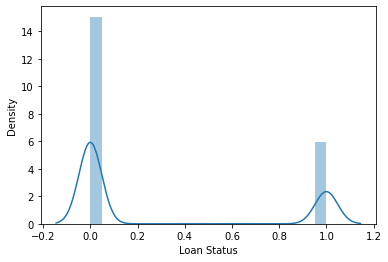

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


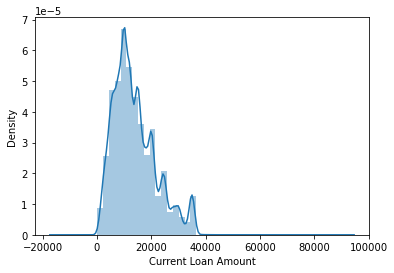

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


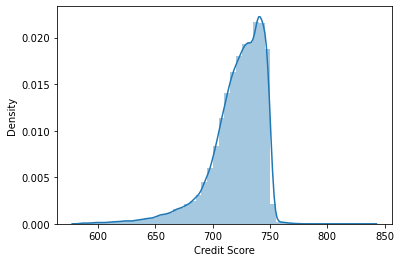

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


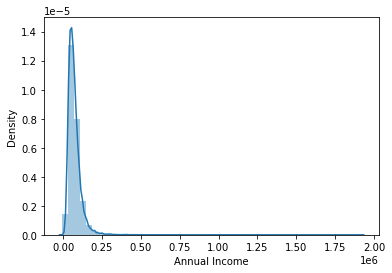

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


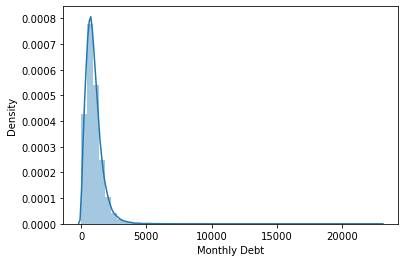

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


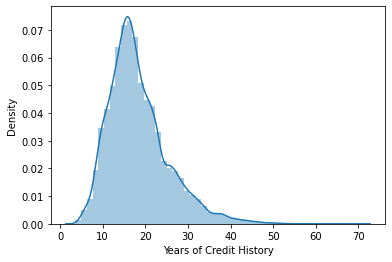

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


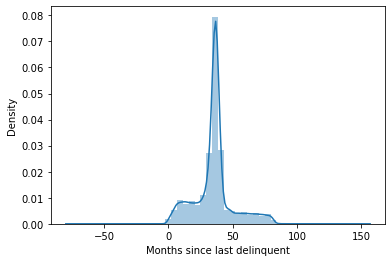

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


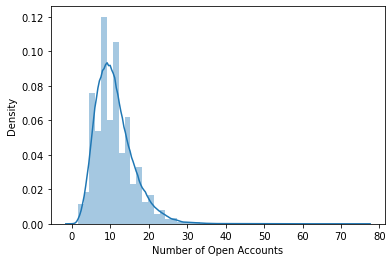

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


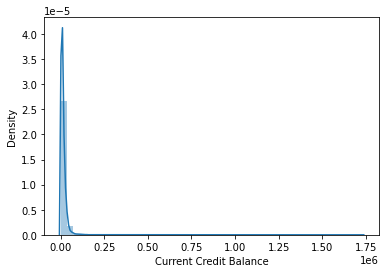

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


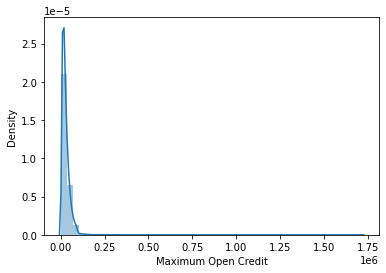

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
for i in train_iter.select_dtypes('number'):
    sns.distplot(train_iter[i])
    plt.show()

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


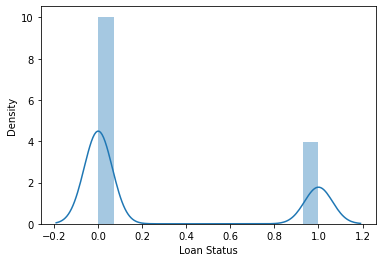

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


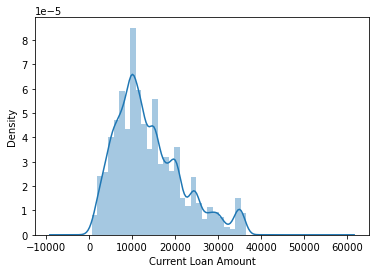

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


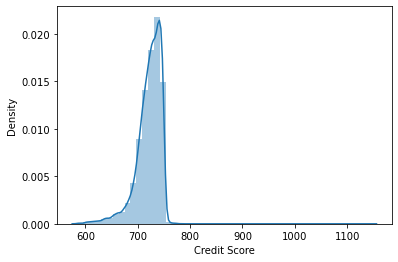

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


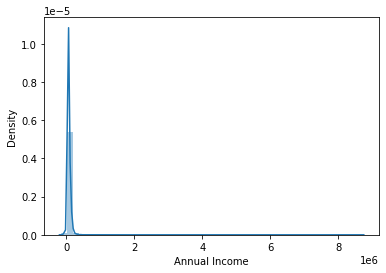

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


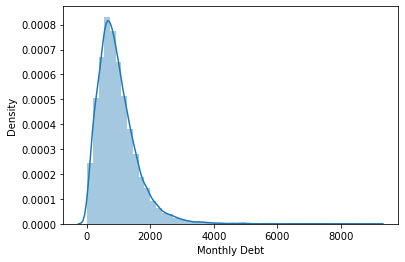

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


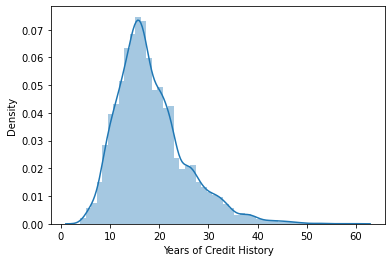

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


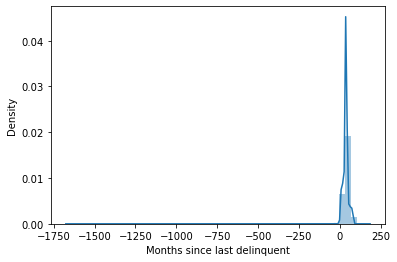

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


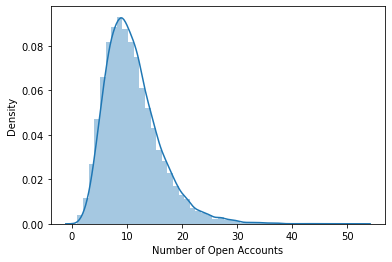

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


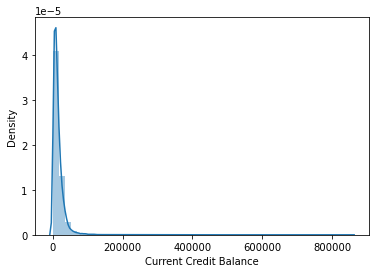

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


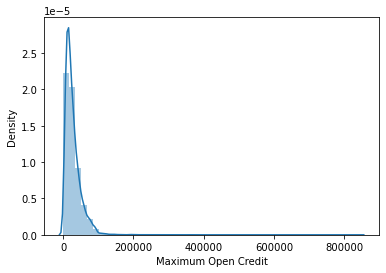

In [23]:
for i in train_iter.select_dtypes('number'):
    sns.distplot(valid_iter[i])
    plt.show()

In [41]:
valid_knn

,Loan Status,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Current Credit Balance,Maximum Open Credit,Term,Years in current job,Home Ownership,Purpose,Number of Credit Problems,Bankruptcies,Tax Liens
0,0.0,22079.0,738.6,73055.8,1523.46,20.0,3.0,12.0,12470.0,25090.0,1,0.0,Home Mortgage,Debt Consolidation,0,0.0,0.0
1,0.0,34699.0,719.6,128405.6,1974.54,16.2,17.0,14.0,30262.0,31524.0,1,10.0,Home Mortgage,Debt Consolidation,0,0.0,0.0
2,0.0,8625.4,723.0,59064.0,458.73,29.5,36.6,6.0,6779.0,6889.0,0,3.0,Home Mortgage,Debt Consolidation,1,1.0,0.0
3,1.0,6085.0,728.8,25355.0,536.68,8.0,37.6,11.0,4317.0,5980.0,0,3.0,Rent,Debt Consolidation,0,0.0,0.0
4,0.0,14926.0,733.8,61839.8,652.15,14.6,34.6,13.0,18536.0,28693.0,1,8.0,Home Mortgage,Debt Consolidation,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17777,1.0,6092.0,737.0,25383.0,704.36,26.5,16.0,12.0,11348.0,18573.0,0,10.0,Rent,Debt Consolidation,0,0.0,0.0
17778,0.0,35560.0,641.0,89408.0,1773.26,15.4,37.0,14.0,36974.0,65557.0,1,5.0,Home Mortgage,Debt Consolidation,0,0.0,0.0
17779,0.0,19840.0,738.2,88556.8,1571.16,27.5,20.6,10.0,26871.0,82175.0,0,10.0,Home Mortgage,Debt Consolidation,0,0.0,0.0
17780,0.0,21996.8,708.0,404120.0,2077.85,19.1,21.0,18.0,60095.0,73305.6,0,5.0,Home Mortgage,Debt Consolidation,0,0.0,0.0


In [42]:
x_validknn

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Current Credit Balance,Maximum Open Credit,Term,Home Ownership,Purpose,Number of Credit Problems,Bankruptcies,Tax Liens
0,22079.0,738.6,73055.8,1523.46,20.0,12.0,12470.0,25090.0,1,Home Mortgage,Debt Consolidation,0,0.0,0.0
1,34699.0,719.6,128405.6,1974.54,16.2,14.0,30262.0,31524.0,1,Home Mortgage,Debt Consolidation,0,0.0,0.0
2,8625.4,723.0,59064.0,458.73,29.5,6.0,6779.0,6889.0,0,Home Mortgage,Debt Consolidation,1,1.0,0.0
3,6085.0,728.8,25355.0,536.68,8.0,11.0,4317.0,5980.0,0,Rent,Debt Consolidation,0,0.0,0.0
4,14926.0,733.8,61839.8,652.15,14.6,13.0,18536.0,28693.0,1,Home Mortgage,Debt Consolidation,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17777,6092.0,737.0,25383.0,704.36,26.5,12.0,11348.0,18573.0,0,Rent,Debt Consolidation,0,0.0,0.0
17778,35560.0,641.0,89408.0,1773.26,15.4,14.0,36974.0,65557.0,1,Home Mortgage,Debt Consolidation,0,0.0,0.0
17779,19840.0,738.2,88556.8,1571.16,27.5,10.0,26871.0,82175.0,0,Home Mortgage,Debt Consolidation,0,0.0,0.0
17780,21996.8,708.0,404120.0,2077.85,19.1,18.0,60095.0,73305.6,0,Home Mortgage,Debt Consolidation,0,0.0,0.0


In [43]:
x_validiter

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Current Credit Balance,Maximum Open Credit,Term,Home Ownership,Purpose,Number of Credit Problems,Bankruptcies,Tax Liens
0,22079.000000,717.979469,193025.326090,1523.46,20.0,12.0,12470.0,25090.00000,1,Home Mortgage,Debt Consolidation,0,0.0,0.0
1,34699.000000,693.697022,182304.996048,1974.54,16.2,14.0,30262.0,31524.00000,1,Home Mortgage,Debt Consolidation,0,0.0,0.0
2,10797.526284,723.000000,59064.000000,458.73,29.5,6.0,6779.0,6889.00000,0,Home Mortgage,Debt Consolidation,1,1.0,0.0
3,6085.000000,709.945101,25355.000000,536.68,8.0,11.0,4317.0,5980.00000,0,Rent,Debt Consolidation,0,0.0,0.0
4,14926.000000,719.693701,62685.697151,652.15,14.6,13.0,18536.0,28693.00000,1,Home Mortgage,Debt Consolidation,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17777,6092.000000,716.493735,25383.000000,704.36,26.5,12.0,11348.0,18573.00000,0,Rent,Debt Consolidation,0,0.0,0.0
17778,35560.000000,641.000000,89408.000000,1773.26,15.4,14.0,36974.0,65557.00000,1,Home Mortgage,Debt Consolidation,0,0.0,0.0
17779,19840.000000,750.237940,122501.029648,1571.16,27.5,10.0,26871.0,82175.00000,0,Home Mortgage,Debt Consolidation,0,0.0,0.0
17780,29603.804785,708.000000,404120.000000,2077.85,19.1,18.0,60095.0,78463.33561,0,Home Mortgage,Debt Consolidation,0,0.0,0.0


In [ ]:
#testing with dummies

In [24]:
x_trainiterd=pd.get_dummies(data=x_trainiter,columns=list(train_iter.select_dtypes('category').drop('Years in current job',axis=1).columns))
x_validiterd=pd.get_dummies(data=x_validiter,columns=list(valid_iter.select_dtypes('category').drop('Years in current job',axis=1).columns))

In [26]:
for i in x_trainiterd.columns:
    if i  not in x_validiterd.columns:
        x_validiterd[i]=0

In [27]:
x_validiterd

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Current Credit Balance,Maximum Open Credit,Term_0,Term_1,...,Number of Credit Problems_9,Number of Credit Problems_10,Number of Credit Problems_12,Number of Credit Problems_15,Bankruptcies_6.0,Bankruptcies_7.0,Tax Liens_8.0,Tax Liens_9.0,Tax Liens_10.0,Tax Liens_15.0
0,22079.000000,717.979469,193025.326090,1523.46,20.0,12.0,12470.0,25090.00000,0,1,...,0,0,0,0,0,0,0,0,0,0
1,34699.000000,693.697022,182304.996048,1974.54,16.2,14.0,30262.0,31524.00000,0,1,...,0,0,0,0,0,0,0,0,0,0
2,10797.526284,723.000000,59064.000000,458.73,29.5,6.0,6779.0,6889.00000,1,0,...,0,0,0,0,0,0,0,0,0,0
3,6085.000000,709.945101,25355.000000,536.68,8.0,11.0,4317.0,5980.00000,1,0,...,0,0,0,0,0,0,0,0,0,0
4,14926.000000,719.693701,62685.697151,652.15,14.6,13.0,18536.0,28693.00000,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17777,6092.000000,716.493735,25383.000000,704.36,26.5,12.0,11348.0,18573.00000,1,0,...,0,0,0,0,0,0,0,0,0,0
17778,35560.000000,641.000000,89408.000000,1773.26,15.4,14.0,36974.0,65557.00000,0,1,...,0,0,0,0,0,0,0,0,0,0
17779,19840.000000,750.237940,122501.029648,1571.16,27.5,10.0,26871.0,82175.00000,1,0,...,0,0,0,0,0,0,0,0,0,0
17780,29603.804785,708.000000,404120.000000,2077.85,19.1,18.0,60095.0,78463.33561,1,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
for i in x_validiterd.columns:
    if i  not in x_trainiterd.columns:
        x_trainiterd[i]=0

In [30]:
x_trainiterd

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Current Credit Balance,Maximum Open Credit,Term_0,Term_1,...,Tax Liens_4.0,Tax Liens_5.0,Tax Liens_6.0,Tax Liens_7.0,Tax Liens_8.0,Tax Liens_9.0,Tax Liens_10.0,Tax Liens_15.0,Number of Credit Problems_11,Tax Liens_11.0
0,15294.000000,747.00000,76470.000000,788.28,19.2,20.0,42776.0,92590.0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,8265.000000,731.44562,42853.020775,785.74,13.8,12.0,8600.0,11317.0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,11970.000000,747.00000,119700.000000,671.32,25.5,5.0,22222.0,39612.0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,9995.142903,741.00000,76206.000000,1149.44,18.6,16.0,10885.0,11141.0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5042.000000,724.00000,47894.000000,786.26,13.4,14.0,9703.0,19883.0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71123,6989.000000,651.00000,30279.000000,772.11,17.8,10.0,3178.0,8878.0,1,0,...,0,0,0,0,0,0,0,0,0,0
71124,11864.000000,737.00000,69209.000000,1211.16,15.4,16.0,4807.0,11179.0,1,0,...,0,0,0,0,0,0,0,0,0,0
71125,12325.000000,641.00000,34237.000000,359.49,12.0,11.0,12646.0,27794.0,0,1,...,0,0,0,0,0,0,0,0,0,0
71126,7095.901348,734.00000,34823.000000,452.70,13.6,21.0,13705.0,16692.0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
lgbm1.fit(x_trainiterd,y_trainiter)

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100


LGBMClassifier(is_unbalance=True, learning_rate=0.03, max_depth=5, metric='f1',
               min_data_in_leaf=100, n_estimators=1500, n_jobs=4,
               num_leaves=32)

In [32]:
pd.DataFrame(data=[accuracy_score(y_trainiter,lgbm1.predict(x_trainiterd)), recall_score(y_trainiter,lgbm1.predict(x_trainiterd)),
                   precision_score(y_trainiter,lgbm1.predict(x_trainiterd)), roc_auc_score(y_trainiter,lgbm1.predict_proba(x_trainiterd)[:,1]),
                   f1_score(y_trainiter,lgbm1.predict(x_trainiterd))], 
             index=["accuracy", "recall", "precision", "roc_auc_score","f1_score"])

,0
accuracy,0.790181
recall,0.768497
precision,0.601290
roc_auc_score,0.872033
f1_score,0.674688


In [33]:
#Using metrics to test the model
pd.DataFrame(data=[accuracy_score(y_validiter,lgbm1.predict(x_validiterd)), recall_score(y_validiter,lgbm1.predict(x_validiterd)),
                   precision_score(y_validiter,lgbm1.predict(x_validiterd)), roc_auc_score(y_validiter,lgbm1.predict_proba(x_validiterd)[:,1]),
                   f1_score(y_validiter,lgbm1.predict(x_validiterd))], 
             index=["accuracy", "recall", "precision", "roc_auc_score","f1_score"])

,0
accuracy,0.732314
recall,0.720357
precision,0.519702
roc_auc_score,0.809285
f1_score,0.603796


In [51]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [53]:
x_trainpca=pd.DataFrame(PCA(0.99).fit_transform(MinMaxScaler().fit_transform(x_trainiterd)))

In [54]:
x_trainpca

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.463029,0.066867,-0.611630,-0.290101,-0.087117,0.028468,-0.016347,0.006674,-0.001502,-0.003392,...,0.024777,0.002048,-0.021892,0.029514,-0.001062,-0.013185,-0.015956,0.101603,-0.004374,0.050636
1,-0.877791,1.555711,0.790279,-0.204046,-0.119267,-0.033249,-0.163475,0.000334,-0.031526,-0.004710,...,-0.047053,0.031923,-0.026023,0.019978,0.002851,-0.008557,-0.015952,0.036193,0.000851,0.014645
2,0.461851,0.069778,-0.612879,-0.286491,-0.086173,0.029775,-0.017957,0.007790,0.001665,-0.001518,...,0.087041,-0.009377,-0.042930,0.053429,0.000203,0.004354,0.009950,-0.075476,0.001928,-0.053087
3,-0.828706,-0.215982,-0.121736,-0.215419,-0.107876,-0.051789,-0.015618,-0.032913,-0.005750,-0.010903,...,0.049876,-0.002353,-0.028235,0.028252,-0.001208,-0.008067,-0.010186,0.054769,-0.004294,0.049655
4,-0.832022,-0.217691,-0.118374,-0.212475,-0.108882,-0.049452,-0.015834,-0.032404,-0.006145,-0.009686,...,-0.047527,0.010569,-0.012422,0.004024,-0.001501,0.000477,-0.001072,0.005895,-0.004037,0.074299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71123,-0.825501,-0.224414,-0.098862,-0.207734,-0.108241,-0.041806,-0.010607,-0.035260,-0.003068,-0.002269,...,-0.050874,0.004107,0.162439,-0.195066,-0.008400,0.031273,0.026040,-0.131031,0.002437,0.082804
71124,-0.829242,-0.217626,-0.120029,-0.215319,-0.108517,-0.051774,-0.015316,-0.033003,-0.006553,-0.010719,...,0.003740,0.005386,-0.018785,0.016571,-0.001380,-0.010696,-0.012571,0.069697,-0.003398,0.037601
71125,-0.258127,-0.804688,1.056179,-0.128014,-0.108243,-0.035726,-0.016453,-0.024671,-0.001451,-0.007562,...,-0.125477,0.017016,0.111610,-0.142833,-0.005825,0.025827,0.021078,-0.098442,-0.000334,0.081009
71126,-0.830835,-0.217252,-0.120414,-0.214957,-0.108690,-0.051039,-0.015587,-0.032783,-0.007042,-0.011173,...,-0.025069,0.008319,-0.021248,0.016251,-0.001575,-0.009067,-0.013840,0.088070,-0.007310,0.115523


In [63]:
x_validpca=pd.DataFrame(PCA(0.99).fit_transform(MinMaxScaler().fit_transform(x_validiterd)))

In [64]:
x_validpca

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,1.008632,-0.513098,0.622900,-0.201071,-0.075426,0.041289,-0.011042,0.013924,0.003340,-0.001954,...,0.006747,-0.001688,-0.004172,-0.015943,0.003167,-0.001684,0.004513,-0.000891,-0.000868,-0.005712
1,1.019765,-0.523756,0.635343,-0.208557,-0.076828,0.034835,-0.004893,0.010134,0.003041,0.004894,...,0.185548,0.039431,0.031675,-0.086732,0.004034,-0.006907,0.016185,0.002948,-0.002522,-0.008996
2,0.445185,1.839442,0.227958,-0.305745,-0.091313,0.068212,-0.177715,0.023232,-0.013000,0.004232,...,-0.137354,-0.056696,-0.050985,-0.092311,0.003033,-0.000410,-0.001198,-0.004539,0.000564,0.003486
3,-0.846478,-0.213622,-0.112010,-0.202943,-0.107635,-0.055021,-0.021957,-0.029522,-0.017731,-0.022204,...,0.033016,0.007217,0.003734,0.051820,-0.006635,0.002992,-0.005256,-0.004135,-0.000919,0.003819
4,0.996630,-0.509201,0.616577,-0.195904,-0.075857,0.043624,-0.016265,0.018179,-0.006823,-0.016270,...,-0.017126,-0.006412,-0.007866,0.051807,0.000124,0.001126,-0.003134,-0.002005,0.000977,0.004420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17777,-0.832392,-0.208063,-0.112884,-0.205835,-0.103563,-0.051270,-0.018548,-0.034612,0.005798,0.003632,...,-0.142273,-0.031169,-0.032795,0.067401,-0.001439,0.003012,-0.009552,-0.000278,0.000598,0.004552
17778,1.020411,-0.525480,0.638745,-0.207925,-0.076771,0.035055,-0.004525,0.010201,0.002254,0.005342,...,0.205150,0.044538,0.036611,-0.099438,0.005033,-0.007096,0.017208,0.005678,-0.004169,-0.004441
17779,0.485533,0.011172,-0.574883,-0.309868,-0.076576,0.032993,-0.011642,0.003099,0.012360,0.012368,...,-0.027949,-0.012455,-0.011762,-0.071430,0.004236,-0.005809,0.004251,0.002324,-0.001274,-0.007180
17780,0.494078,0.000112,-0.563157,-0.318063,-0.079046,0.027116,-0.006095,-0.000732,0.004141,0.012524,...,0.218399,0.054383,0.035553,-0.022689,0.002531,-0.009220,0.009894,0.002836,-0.001035,-0.006194


In [65]:
lgbm1.fit(x_trainpca,y_trainiter)

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100


LGBMClassifier(is_unbalance=True, learning_rate=0.03, max_depth=5, metric='f1',
               min_data_in_leaf=100, n_estimators=1500, n_jobs=4,
               num_leaves=32)

In [66]:
pd.DataFrame(data=[accuracy_score(y_trainiter,lgbm1.predict(x_trainpca)), recall_score(y_trainiter,lgbm1.predict(x_trainpca)),
                   precision_score(y_trainiter,lgbm1.predict(x_trainpca)), roc_auc_score(y_trainiter,lgbm1.predict_proba(x_trainpca)[:,1]),
                   f1_score(y_trainiter,lgbm1.predict(x_trainpca))], 
             index=["accuracy", "recall", "precision", "roc_auc_score","f1_score"])

,0
accuracy,0.756706
recall,0.738455
precision,0.552640
roc_auc_score,0.833622
f1_score,0.632176


In [67]:
#Using metrics to test the model
pd.DataFrame(data=[accuracy_score(y_validiter,lgbm1.predict(x_validpca)), recall_score(y_validiter,lgbm1.predict(x_validpca)),
                   precision_score(y_validiter,lgbm1.predict(x_validpca)), roc_auc_score(y_validiter,lgbm1.predict_proba(x_validpca)[:,1]),
                   f1_score(y_validiter,lgbm1.predict(x_validpca))], 
             index=["accuracy", "recall", "precision", "roc_auc_score","f1_score"])

,0
accuracy,0.547126
recall,0.503873
precision,0.313520
roc_auc_score,0.544498
f1_score,0.386532


In [68]:
#Iterative Imputer outperforms letting LGBM deal with null values on its own. But we need to take caution as it could also cause
#datasets to be biased due to presence of target and it using regression. PCA Reduces everything,without scaling.